# 국민청원 데이터 분석하기 
- 국민청원 데이터의 시각화 및 간단한 분석을 해봅니다. 

In [1]:
#출력데이터가 지저분하게 보이지 않도록 warnings을 불러옵니다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pandas와 numpy 패키지로 데이터를 다룹니다. 
import pandas as pd  
import numpy as np

#그래프의 값을 정렬해서 보기위해 pandas.api.types을 다룹니다. 
from pandas.api.types import CategoricalDtype 

In [3]:
#시각화 도구로 plotnine(A grammar of graphics for Python)을 사용합니다.
from plotnine import *  

In [4]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어옵니다
petitions = pd.read_csv('petition.csv', 
                        index_col=0,
                        parse_dates=['start', 'end'])

In [5]:
# head를 통해 기본 상위 5개의 데이터를 봅니다. 
petitions.head()  

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


# 답변대상 청원 컬럼 다시 만들기

- 기존 answerd컬럼은 답변 여부가 있었습니다. 여기에서는 답변 받은 것과 상관없이 답변 대상 건에 대해 새로운 컬럼을 추가해 주었습니다.

In [6]:
# 투표수가 20만개 초과할 때 True, 20만개 미만일때 False로 구별해주는 컬럼을 생성합니다.
petitions['answer'] = (petitions['votes'] > 200000) == 1  
petitions.shape

(395547, 8)

In [7]:
petitions.head()

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


# 청원기간 컬럼 생성

In [8]:
petitions['duration'] = petitions['end'] - petitions['start']  # 청원 마감일에서 청원 시작일 빼는 값을 컬럼에 추가합니다.
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
12781,2017-09-08,2017-09-15,0,0,육아/교육,청소년,동의합니다,False,7 days
10813,2017-09-06,2017-09-13,0,0,안전/환경,청소년보호법폐지해주세요,갈수록 영악해지고 잔인해지는 청소년들의 범죄예방을 위해 꼭폐지되어야한다고 생각합니다...,False,7 days
10816,2017-09-06,2017-09-13,0,1,인권/성평등,청소년보호법 폐지해야합니다!,이번 부산 사하 여중생 폭행사건으로 인하여 청소년이라는 이유로 범죄자인데 처벌을 약...,False,7 days


In [9]:
#답변 대상 청원
#20만건 이상의 투표를 받으면 답변을 받을 수 있는 청원이 됩니다.
#답변 대상 청원만 따로 모아줍니다.

In [10]:
# 데이터셋에서 투표수가 20만개를 넘은 청원을 새로운 데이터프레임에 모아줍니다.
answered_df = petitions.loc[petitions['votes'] > 200000]  
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 80건


In [11]:
answered_df.head()

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


# 일별 청원 수 시각화

In [12]:
# 날짜별 청원 수를 구하고 날짜로 정렬합니다. 
petition_count = petitions['start'].value_counts().reset_index()
petition_count.columns = ['start', 'count']
petition_count = petition_count['start'].sort_values().reset_index()
petition_count.columns = ['count', 'start']
petition_count.head()

,count,start
0,533,2017-08-19
1,526,2017-08-20
2,524,2017-08-21
3,531,2017-08-22
4,528,2017-08-23


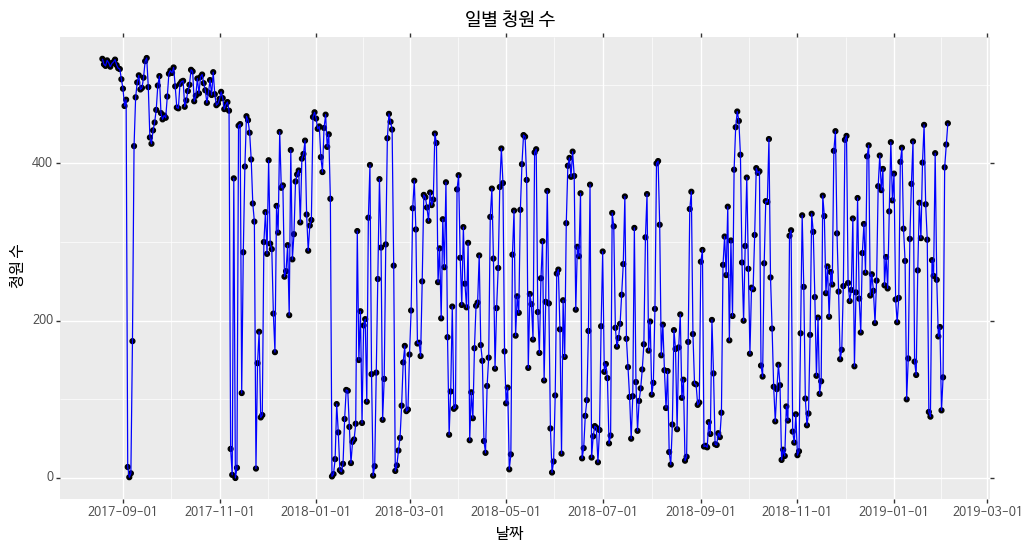

<ggplot: (-9223371888422570280)>

In [13]:
(ggplot(petition_count)      # 날짜로 정렬한 데이터프레임을 담습니다. 
 + aes(x='start', y='count') # x축을 청원 날짜로, y축을 청원 수로 설정
 + geom_point()              # 점 생성
 + geom_line(color='blue')  # 색깔을 파랑으로 설정
 + labs(x='날짜', y='청원 수', title='일별 청원 수')  # x,y축에 타이틀 설정
 + theme(text=element_text(family='NanumBarunGothic'), # 글자가 깨지는 것을 방지하기 위해 폰트를 나눔바른고딕으로 변경
        figure_size=(12,6))
)

# 카테고리별 투표 수 시각화

In [14]:
# pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있습니다.
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

# 아래 표를 통해 정치개혁과 관련된 국민청원이 가장 많다는 것을 확인할 수 있습니다. 

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


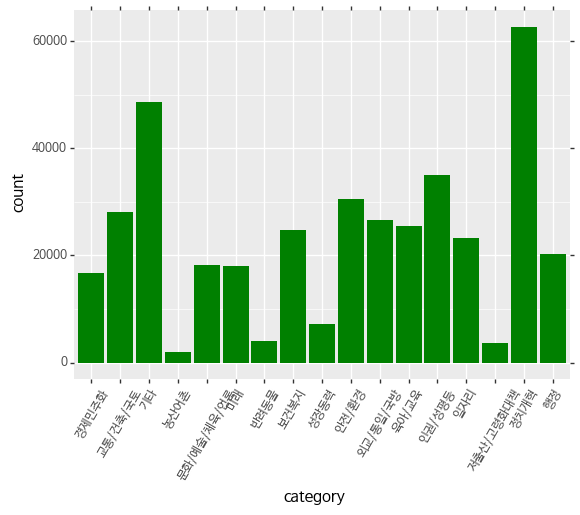

<ggplot: (-9223371888543439348)>

In [15]:
# x축을 category로, y축을 청원 수로 잡아 분야별 청원 수를 시각화합니다. 
(ggplot(petitions)
 + aes('category') 
 + geom_bar(fill='green') #막대 그래프 색깔을 초록으로 설정
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))  # 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
)

# 카테고리별 20만 건 이상인 투표 수 시각화

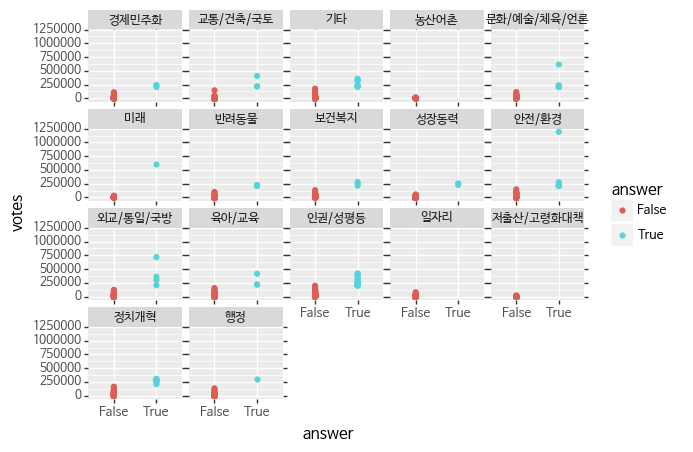

<ggplot: (-9223371888543443132)>

In [16]:
# 20만건 이상 투표를 받아야지만 답변을 받을 수 있다는것을 그래프를 통해 짐작해볼 수 있습니다.
# 답변을 받지못한 카테고리도 있음을 확인할 수 있습니다. 
(ggplot(petitions)
 + aes('answer', 'votes')
 + aes(color='answer')
 + geom_point()
 + facet_wrap('~category')
 + theme(text=element_text(family='NanumBarunGothic'))
)

# 제목과 내용에 들어가는 중복을 제외한 단어수 시각화 
 - 데이터셋에 제목과 내용의 단어수를 구하고 그 제목과 내용에서 중복을 제거하여 남은 단어 수를 구합니다.

In [17]:
%time petitions['title_num_words'] = petitions['title'].apply(lambda x: len(str(x).split()))  # 제목의 단어수 구하기
%time petitions['title_num_uniq_words'] = petitions['title'].apply(lambda x: len(set(str(x).split())))  # 중복 제거

Wall time: 437 ms
Wall time: 737 ms


In [18]:
%time petitions['content_num_words'] = petitions['content'].apply(lambda x: len(str(x).split())) # 내용의 단어수 구하기
%time petitions['content_num_uniq_words'] = petitions['content'].apply(lambda x: len(set(str(x).split()))) # 중복 제거

Wall time: 5.01 s
Wall time: 9.01 s


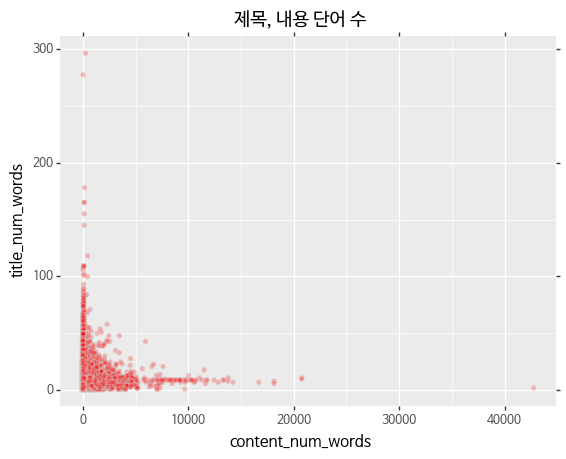

<ggplot: (-9223371888537135068)>

In [19]:
#제목과 내용의 단어수를 점 그래프로 시각화하여 나타냅니다. 
(ggplot(petitions)
 + aes('title_num_words', 'content_num_words')
 + geom_point(fill='red', color='lightgray', alpha=0.25)
 + ggtitle('제목, 내용 단어 수')  # 제목 설정
 + coord_flip()  # 점그래프
 + theme(text=element_text(family='NanumBarunGothic'))
)